# Visualisation: Plotting with pandas

In this section we will make plots directly from pandas series and dataframes. You can call methods directly on dataframes and series, which then return matplotlib axis objects. In a Jupyter notebook, those plots will automatically display.

For a single set of data, you can plot using a pandas `Series` object. Calling `Series.plot` returns an `Axis` object, which can then use for formatting.

In [1]:
# Importing Python packages we are likely to need
import pandas as pd  # data tables
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # plotting
import numpy as np  # mathematical operations

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
s = pd.Series(y, index=x)
s

1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64

We call the `plot` method to make a plot from a `Series`:

```python
    my_series.plot()
```

<AxesSubplot:>

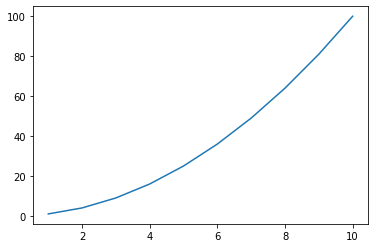

In [3]:
s.plot()

For plots other than line plots, you first call `plot` before the plot type that you want.

```python
    my_series.plot.bar()
```

<AxesSubplot:>

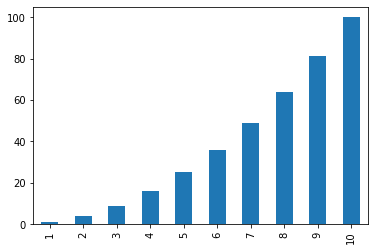

In [4]:
s.plot.bar()

You can pass in arguments when you call the ploting method.

```python
s.plot.bar(title='My nice chart with a title')
```

<AxesSubplot:title={'center':'My nice chart with a title'}>

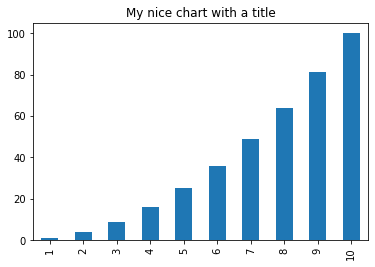

In [5]:
s.plot.bar(title='My nice chart with a title')

When you call the plotting methods, they return an `Axis` object. This means after plotting you can call methods on the `Axis` object to more precisely control the formatting.

```python
series_ax = s.plot.bar()
series_ax.set_title("Here's a new title")
series_ax.set_xlabel("Independent variable")
series_ax.set_ylabel("Dependent variable")
```

Text(0, 0.5, 'Dependent variable')

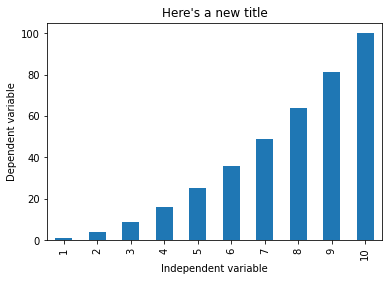

In [6]:
series_ax = s.plot.bar()
series_ax.set_title("Here's a new title")
series_ax.set_xlabel("Independent variable")
series_ax.set_ylabel("Dependent variable")

## Plotting with DataFrames

Calling plotting methods on dataframes can let you quickly plot multiple things on the same axis.

First let's make a dataframe:

In [7]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame(index=x)
df['squared'] = np.power(x, 2)
df['cubed'] = np.power(x, 3)
df.head(3)

,squared,cubed
1,1,1
2,4,8
3,9,27


Dataframes also have a plot method. They will plot all the columns' data.

```python
df.plot()
df.plot.bar()
```

<AxesSubplot:>

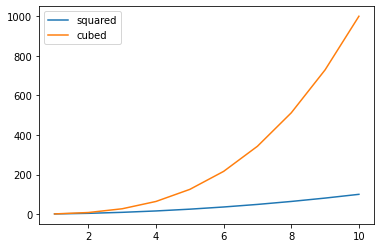

In [8]:
df.plot()

<AxesSubplot:>

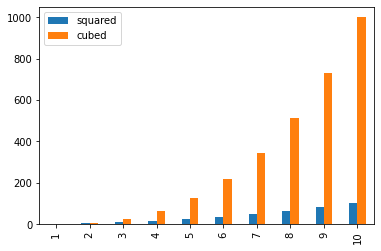

In [9]:
df.plot.bar()

## Dataframes and subplots

Plotting with dataframes also allows you to make multiple axis side by side, as subplots.

```python
df.plot(subplots=True)
```

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

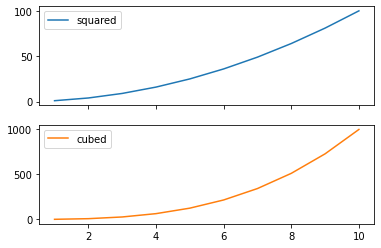

In [10]:
df.plot(subplots=True)

This time, the plotting method has returned an array of `Axis` objects. You can do further formatting by accessing the axes in this array.

```python
axes = df.plot(subplots=True)
axes[0].set_title("This is plot number 0")
axes[1].set_title("This is plot number 1")
```

Text(0.5, 1.0, 'This is plot number 1')

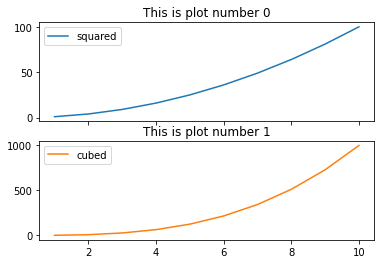

In [11]:
axes = df.plot(subplots=True)
axes[0].set_title("This is plot number 0")
axes[1].set_title("This is plot number 1")

### Exercise

The code below will create a fake time series dataset. Plot the data on a single axis and then on two separate axes.

In [12]:
# Don't change code in this cell
np.random.seed(42)
dates = pd.date_range("2021-01-01", "2021-12-31", periods=52)
numbers = np.arange(len(dates))
ts_df = pd.DataFrame(index=dates)
ts_df['metric1'] = np.sin(0.5 * numbers + 3) + 10 + np.random.normal(scale=0.5, size=len(dates))
ts_df['metric2'] = np.sin(0.5 * numbers) + 7 + np.random.normal(scale=0.5, size=len(dates))

In [13]:
# First few rows of the dataset
ts_df.head()

,metric1,metric2
2021-01-01 00:00:00.000000000,10.389477,6.661539
2021-01-08 03:17:38.823529411,9.580085,7.785264
2021-01-15 06:35:17.647058823,9.567042,8.356971
2021-01-22 09:52:56.470588235,9.783985,8.463135
2021-01-29 13:10:35.294117647,8.923999,7.489689


<AxesSubplot:>

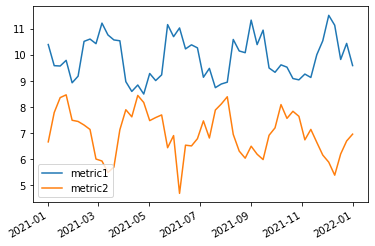

In [14]:
ts_df.plot()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

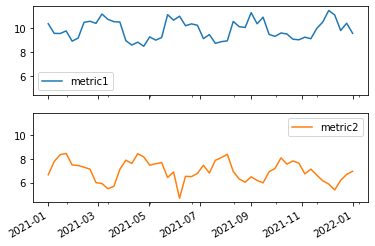

In [17]:
ts_df.plot(subplots=True, sharey=True)  # sharey=True means y axes have same scale